# __packages__

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pickle_path = "./sampled_data/sampled_data_200000.pickle"

---
# __functions__

In [2]:
# plot function
def plot_histogram(nums, title=None, bins=None):
    fig, ax = plt.subplots()
    if bins:
        counts, bins, patches = ax.hist(nums, bins=bins, density=False)
    else:
        counts, bins, patches = ax.hist(nums, density=False)
    
    if title:
        plt.title(title)
    plt.show()
    
    return counts, bins, patches

def plot_heatmap(groupby, pivot_col, title=None):
    
    assert type(pivot_col) == list and len(pivot_col) == 3
    
    groupby = groupby.reset_index()
    groupby_pivoted = groupby.pivot(*pivot_col)
    
    if title:
        sns.heatmap(groupby_pivoted, annot=True, fmt=".4f").set(title=title)
    else:
        sns.heatmap(groupby_pivoted, annot=True, fmt=".4f")

---
# __tracks__

### 1) load tracks data and apply basic statistics
### 2) remove outliers for duration

In [3]:
from preprocess.spotify_tracks_preprocess import pre_processed_df

# load data
tracks = pre_processed_df()
tracks["duration_m"] = tracks.duration_ms.apply(lambda x: x / 60000)
print(f"columns: \n{tracks.dtypes}")
print()
print(tracks.isna().sum())

# basic statistics
stat = tracks.describe(percentiles=[.25, .5, .75, .95])
stat

columns: 
track_id         object
album_id         object
artists_id       object
disc_number       int64
duration_ms       int64
explicit           bool
name             object
popularity        int64
track_number      int64
duration_m      float64
dtype: object

track_id        0
album_id        0
artists_id      0
disc_number     0
duration_ms     0
explicit        0
name            0
popularity      0
track_number    0
duration_m      0
dtype: int64


,disc_number,duration_ms,popularity,track_number,duration_m
count,2.258987e+06,2.258987e+06,2.258987e+06,2.258987e+06,2.258987e+06
mean,1.046625e+00,2.475830e+05,1.336007e+01,6.899378e+00,4.126383e+00
std,4.638743e-01,1.675452e+05,1.389800e+01,7.600618e+00,2.792420e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.842090e+05,1.000000e+00,2.000000e+00,3.070150e+00
50%,1.000000e+00,2.252400e+05,9.000000e+00,5.000000e+00,3.754000e+00
75%,1.000000e+00,2.782800e+05,2.100000e+01,9.000000e+00,4.638000e+00
95%,1.000000e+00,4.330000e+05,4.100000e+01,1.800000e+01,7.216667e+00
max,5.200000e+01,2.074458e+07,9.200000e+01,5.460000e+02,3.457429e+02


In [4]:
# remove outliers for duration
print(f"before shape: {tracks.shape}")
tracks = tracks.loc[tracks.duration_m <= stat.loc["95%", "duration_m"]]

print(f"after shape: {tracks.shape}")

before shape: (2258987, 10)
after shape: (2146074, 10)


### 3) plotting by columns

columns: duration_m


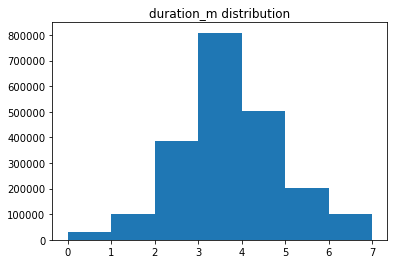


        bins   : [0 1 2 3 4 5 6 7]
        counts : [28950, 100829, 385408, 808621, 502811, 204172, 100581]
          
columns: popularity


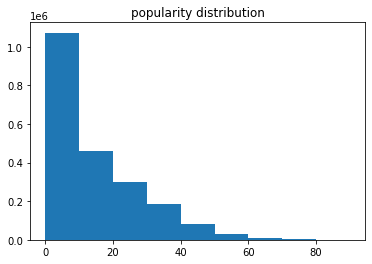


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [1073479, 458430, 301500, 183268, 84276, 32530, 10036, 2279, 273]
          


In [5]:
col_list = ["duration_m", "popularity"]

for col in col_list:
    print(f"columns: {col}")

    if col == "duration_m":
        bins = range(0, 8, 1)
    elif col == "popularity":
        bins = range(0, 100, 10)
        
    counts, bins, patches = plot_histogram(
                                tracks[col].tolist(), 
                                title=f"{col} distribution",
                                bins=bins
                            )
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __audio-features__

### 1) load audio-features data and apply basic statistics

In [6]:
from preprocess.spotify_audio_features_preprocess import pre_processed_df

# load data
audio_features = pre_processed_df()
print(f"columns: \n{audio_features.dtypes}")
print()
print(audio_features.isna().sum())

stat = audio_features.describe()
stat

columns: 
track_id             object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06
mean,3.547740e-01,5.504296e-01,5.848759e-01,2.208220e-01,2.091071e-01,-9.660528e+00,6.549779e-01,8.923351e-02,1.199894e+02,3.879917e+00,4.757061e-01
std,3.543964e-01,1.845300e-01,2.660167e-01,3.494054e-01,1.898148e-01,5.626076e+00,4.753756e-01,1.152086e-01,2.992179e+01,4.720420e-01,2.699766e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.220000e-02,4.270000e-01,3.890000e-01,0.000000e+00,9.570000e-02,-1.191000e+01,0.000000e+00,3.540000e-02,9.693900e+01,4.000000e+00,2.470000e-01
50%,2.150000e-01,5.650000e-01,6.220000e-01,6.030000e-04,1.280000e-01,-8.176000e+00,1.000000e+00,4.700000e-02,1.200070e+02,4.000000e+00,4.660000e-01
75%,6.910000e-01,6.890000e-01,8.090000e-01,4.210000e-01,2.640000e-01,-5.826000e+00,1.000000e+00,8.380000e-02,1.380530e+02,4.000000e+00,6.970000e-01
max,9.960000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,4.923000e+00,1.000000e+00,9.710000e-01,2.499870e+02,5.000000e+00,1.000000e+00


### 2) plotting by columns

columns: acousticness


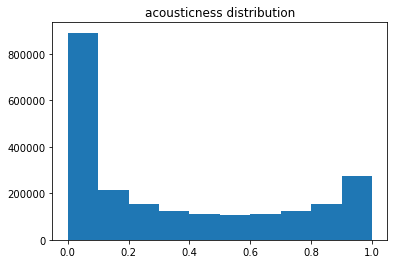


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [890537, 214072, 153003, 122124, 109713, 107108, 111217, 124646, 153876, 275895]
          
columns: danceability


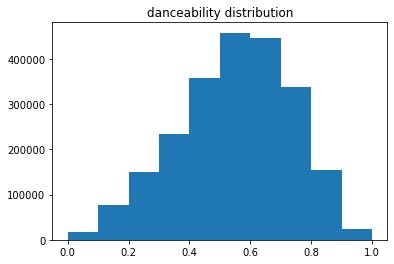


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [18090, 76886, 149794, 234752, 358519, 458618, 447122, 339468, 155488, 23454]
          
columns: energy


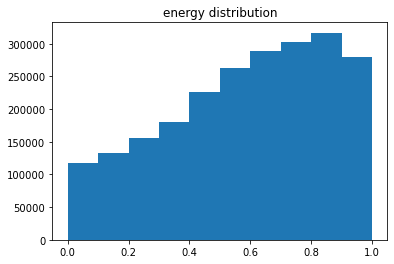


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [118218, 132340, 155959, 179762, 226047, 263194, 288838, 301902, 316847, 279084]
          
columns: instrumentalness


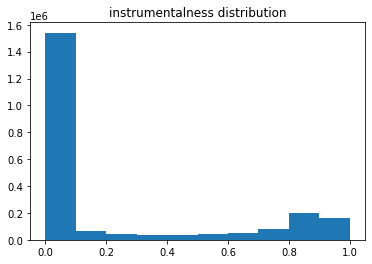


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1540961, 64172, 45327, 38185, 37449, 40944, 51126, 81613, 197796, 164618]
          
columns: liveness


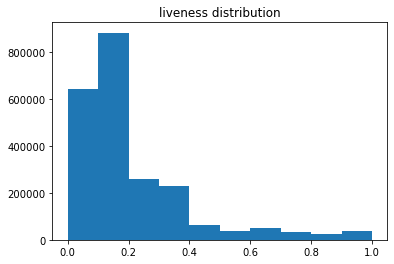


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [643705, 882672, 258940, 229404, 61913, 39516, 48563, 33730, 24144, 39604]
          
columns: loudness


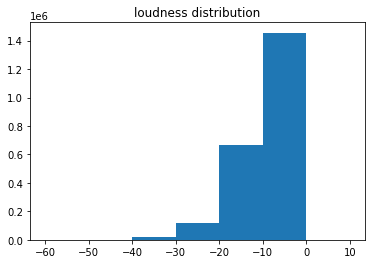


        bins   : [-60 -50 -40 -30 -20 -10   0  10]
        counts : [281, 1428, 16952, 120776, 666086, 1455721, 947]
          
columns: mode


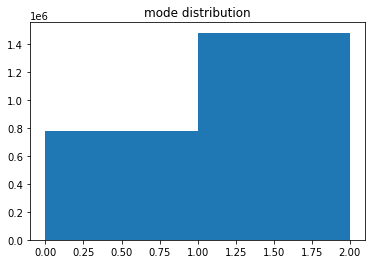


        bins   : [0 1 2]
        counts : [780506, 1481685]
          
columns: speechiness


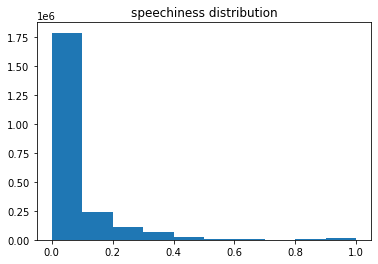


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1789530, 236626, 111162, 67750, 27350, 8175, 3025, 2351, 4338, 11884]
          
columns: tempo


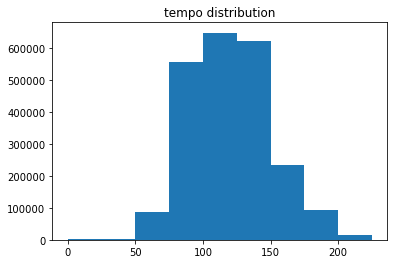


        bins   : [  0  25  50  75 100 125 150 175 200 225]
        counts : [3152, 2150, 87349, 554934, 647775, 622737, 235432, 94565, 13969]
          
columns: time_signature


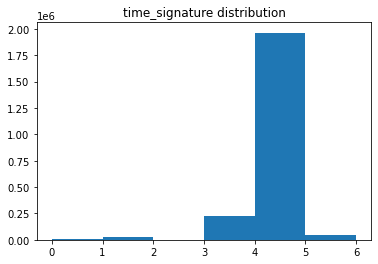


        bins   : [0 1 2 3 4 5 6]
        counts : [3206, 23827, 0, 229148, 1964207, 41803]
          
columns: valence


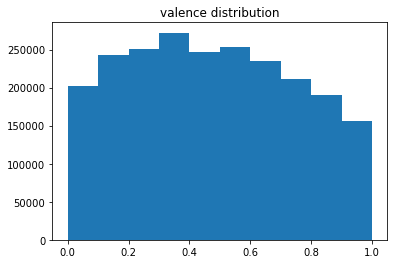


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [202438, 243270, 251219, 272108, 247398, 253887, 234782, 211567, 190046, 155476]
          


In [7]:
col_list = [
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "loudness", 
    "mode", 
    "speechiness",
    "tempo", 
    "time_signature", 
    "valence"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col in ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]:
        bins = list(np.arange(0, 1.1, 0.1))
    elif col == "loudness":
        bins = range(-60, 20, 10)
    elif col == "mode":
        bins = range(0, 3, 1)
    elif col == "tempo":
        bins = range(0, 250, 25)
    elif col == "time_signature": 
        bins = range(0, 7, 1)
        
    counts, bins, patches = plot_histogram(
                                audio_features[col].tolist(), 
                                title=f"{col} distribution",
                                bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __join tracks, albums, audio-features__

### 1) load ablums data
### 2) remove null rows from albums data

In [8]:
album_file_path = "./album_table.csv"
albums = pd.read_csv(album_file_path)
albums["id"] = albums.id.str.strip()
albums["release_date"] = albums.release_date.str.strip()
print(albums.isna().sum())

albums = albums.loc[albums.id.notna()]

print(f"columns: \n{albums.columns}")
print(f"shape: {albums.shape}")


album_type       274
artists_id       274
copyrights       274
genres           274
id               274
label           1455
name             274
popularity       274
release_date     274
total_tracks     274
track_ids        274
dtype: int64
columns: 
Index(['album_type', 'artists_id', 'copyrights', 'genres', 'id', 'label',
       'name', 'popularity', 'release_date', 'total_tracks', 'track_ids'],
      dtype='object')
shape: (845511, 11)


### 3) drop duplicates from albums data

In [9]:
print(f"unique id: {len(albums.id.unique())}")
print(f"duplicated rows: {albums.duplicated().sum()}")
print(f"{len(albums.id.unique())} + {albums.duplicated().sum()} = {len(albums.id.unique())+albums.duplicated().sum()}")

albums = albums.drop_duplicates(subset="id")

unique id: 577186
duplicated rows: 229942
577186 + 229942 = 807128


### 4) combine with tracks, audio-features data
### 5) plot histogram by release year

tracks shape                      : (2146074, 10)
albums shape                      : (577186, 11)
audio-features shape              : (2262191, 12)
tracks and albums                 : (1910460, 11)
tracks, albums, and audio-features: (1281183, 24)


,track_id,album_id,artists_id,disc_number,duration_ms,explicit,name,popularity,track_number,duration_m,...,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5iYe4mt1bf1KVzVM8EY6y8,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,228213,True,Du bist schön,61,19,3.803550,...,0.672,0.676,0.000017,0.735,-6.508,1,0.0381,120.068,4,0.442
1,2YeiTbQiN33B4aWXAEOeZu,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,232466,True,Lass liegen,44,18,3.874433,...,0.671,0.842,0.001240,0.102,-6.679,1,0.1640,143.033,4,0.814
2,00ylpioXq9EFFUbI7gay05,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,251746,True,Musik ist keine Lösung,42,20,4.195767,...,0.708,0.862,0.000000,0.110,-6.072,1,0.0929,114.117,4,0.785
3,3OGlLa9RnR55xOoNOzTgDp,3ruxxNJfKwSeghjqG6JL3y,"0r0R5nIjDY04TfxRM10Bcb,6v2fKtxH2ZyVvk4tSqWeOP",1,226480,True,Trostpreis (feat. Timi Hendrix),40,10,3.774667,...,0.603,0.677,0.000000,0.373,-7.079,0,0.2680,94.756,4,0.860
4,389spw2dydru3AHm42KGmO,3ruxxNJfKwSeghjqG6JL3y,"0r0R5nIjDY04TfxRM10Bcb,6v2fKtxH2ZyVvk4tSqWeOP,...",1,215172,True,Was der Bauer nicht kennt (feat. Timi Hendrix ...,34,14,3.586200,...,0.758,0.680,0.000000,0.111,-5.838,1,0.0561,116.120,4,0.793


[2010 2000 1990 1960 1980 1970 1950 1920 1940 1930 2020 1900 1880 1910]


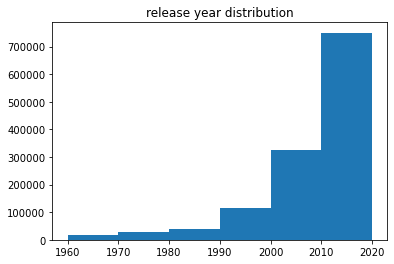

(array([ 17072.,  27114.,  38194., 114474., 326846., 750100.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

In [10]:
print(f"tracks shape                      : {tracks.shape}")
print(f"albums shape                      : {albums.shape}")
print(f"audio-features shape              : {audio_features.shape}")

# join tracks with albums
joined_df = tracks.join(albums.loc[:, ["id", "release_date"]].set_index("id"), how="inner", on="album_id", lsuffix="_caller", rsuffix="_other")
joined_df = joined_df.loc[joined_df.release_date.notna()]
joined_df = joined_df.loc[joined_df.release_date.apply(lambda x: False if x.startswith("0") else True)]
print(f"tracks and albums                 : {joined_df.shape}")

f = lambda x: int(x[:4]) if len(x) >= 5 else int(x)
joined_df["release_year"] = joined_df.release_date.apply(f)

f = lambda x: (x // 10) * 10
joined_df["release_year_bin"] = joined_df.release_year.apply(f)

# join joined_df with audio-features
joined_df = pd.merge(joined_df, audio_features, how="inner", on="track_id")
print(f"tracks, albums, and audio-features: {joined_df.shape}")

display(joined_df.head())
print(joined_df.release_year_bin.unique())

plot_histogram(
    joined_df.release_year_bin.tolist(), 
    title="release year distribution",
    bins=range(1960, 2030, 10)
)

### 6) group the number of songs by popularity and release year

popularity_bin          0                                                    \
release_year_bin      1960     1970      1980      1990      2000      2010   
track_id          0.004789  0.00594  0.008943  0.035152  0.130749  0.331853   

popularity_bin          10                                ...       70  \
release_year_bin      1960      1970      1980      1990  ...     1990   
track_id          0.003717  0.005633  0.007642  0.022363  ...  0.00012   

popularity_bin                                  80                      \
release_year_bin      2000      2010          1960      1970      1980   
track_id          0.000198  0.000476  7.850871e-07  0.000004  0.000008   

popularity_bin                                        90  
release_year_bin      1990      2000      2010      2010  
track_id          0.000007  0.000024  0.000064  0.000002  

[1 rows x 55 columns]

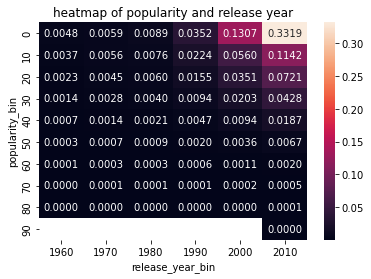

In [11]:
# make a column for popularity bins
joined_df["popularity_bin"] = joined_df.popularity.apply(lambda x: (x // 10) * 10)

# remove outliers of release year
source = joined_df.loc[joined_df.release_year_bin.isin(range(1960, 2020, 10))]

# count songs by popularity and release year
by = ["popularity_bin", "release_year_bin"]

grouped = source[["track_id", "popularity_bin", "release_year_bin"]].groupby(by=by).count().apply(lambda x: x / len(source))
display(grouped.transpose())

plot_heatmap(
    groupby=grouped, 
    pivot_col=["popularity_bin", "release_year_bin", "track_id"], 
    title="heatmap of popularity and release year"
)

### 7) randomly sampling songs by the distribution of raw data

In [12]:
if os.path.isfile(pickle_path):
    print("The file already exists!")

else:
    # the total number of songs that we want to sample
    n = 200000

    index_dic = {}       # index dictionary for extracting sample data
    max_popularity = 0   # the popularity which has the largest sample_n
    max_release_year = 0 # the release year which has the largest sample_n
    max_sample_n = 0     # the maximum value of sample_n

    # first of all, decide the sample sizes for each index
    total = 0
    for popularity, release_year in grouped.index:
        
        sample_n = int(n * grouped.loc[popularity, release_year]) + 1
        if sample_n == 0:
            sample_n = 1
        
        # update the maximum values
        if max_sample_n < sample_n:
            max_popularity = popularity
            max_release_year = release_year
            max_sample_n = sample_n
        
        total += sample_n
        index_dic.update({(popularity, release_year): sample_n})

    # if total number of samples is greater than 200000, then decrease the difference from the largest sample
    if total > n:
        index_dic.update({(max_popularity, max_release_year): max_sample_n - (total - n)})

    concat_list = [] # list bucket for concatenating dataframes

    for tup, sample_n in index_dic.items():
        popularity, release_year = tup

        print(f"popularity: {popularity}, release_year: {release_year}, sample_n: {sample_n}")
        
        tmp = joined_df.loc[(joined_df.popularity_bin == popularity) & (joined_df.release_year_bin == release_year)]
        tmp = tmp.sample(n=sample_n, random_state=2022) # fixed random_state
        
        concat_list.append(tmp.copy())

    sample_df = pd.concat(concat_list, axis=0)
    display(sample_df.head())

popularity: 0, release_year: 1960, sample_n: 958
popularity: 0, release_year: 1970, sample_n: 1188
popularity: 0, release_year: 1980, sample_n: 1789
popularity: 0, release_year: 1990, sample_n: 7031
popularity: 0, release_year: 2000, sample_n: 26150
popularity: 0, release_year: 2010, sample_n: 66344
popularity: 10, release_year: 1960, sample_n: 744
popularity: 10, release_year: 1970, sample_n: 1127
popularity: 10, release_year: 1980, sample_n: 1529
popularity: 10, release_year: 1990, sample_n: 4473
popularity: 10, release_year: 2000, sample_n: 11204
popularity: 10, release_year: 2010, sample_n: 22833
popularity: 20, release_year: 1960, sample_n: 467
popularity: 20, release_year: 1970, sample_n: 904
popularity: 20, release_year: 1980, sample_n: 1194
popularity: 20, release_year: 1990, sample_n: 3105
popularity: 20, release_year: 2000, sample_n: 7027
popularity: 20, release_year: 2010, sample_n: 14426
popularity: 30, release_year: 1960, sample_n: 281
popularity: 30, release_year: 1970, s

,track_id,album_id,artists_id,disc_number,duration_ms,explicit,name,popularity,track_number,duration_m,...,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_bin
683391,1SE3FmO6U0yUESdYp7Oclb,4xiybakoRBx67zsjzrHOED,"0nJvyjVTb8sAULPYyA1bqU,2LmyJyCF5V1eQyvHgJNbTn,...",1,357346,False,Symphony for Organ and Orchestra: I. Prelude. ...,1,1,5.955767,...,0.0179,0.829000,0.0962,-31.797,1,0.0407,92.343,3,0.0309,0
445016,6GptflnalJehBvDSkHgjI6,1EakoUcKayQLN1qEfJecvu,5yzE49FicYiSxN61oaxkNn,1,195639,False,Early Morning Rain,9,10,3.260650,...,0.3850,0.019700,0.0931,-10.099,1,0.0327,115.607,4,0.6430,0
419825,5ow3atOwwOlavmKm0HIc4B,5jSwmPrat1yHiNdF4CETSH,3qtcbDvdIgQOXkPbtRvBaQ,1,112360,False,Somerset Gloucestershire Wassail,2,8,1.872667,...,0.5690,0.000006,0.1380,-11.796,1,0.0680,204.243,3,0.9630,0
1136581,5eJ8uZiqsRPYIyjnrpR60l,5e20rmtQS5kYVNqXTbYRaN,1yNOfXGQNGjAynk77wv85x,1,177000,False,I Need You,3,3,2.950000,...,0.0221,0.000057,0.1070,-23.949,0,0.1590,61.476,4,0.3030,0
235153,7hCJxuUl9WmnhiPYmg9kET,2CLiFy7JO1bmkNV6LFEMix,3jiBDfjnWIdLQEEOdKqZex,1,187200,False,A School for Fools,9,8,3.120000,...,0.1130,0.000088,0.1500,-18.750,1,0.0390,177.434,3,0.3580,0


### 8) save the dataframe as a pickle (if the file exists, then do not save the file)

In [13]:
if os.path.isfile(pickle_path):
    print("The file already exists!")
    
else:
    sample_df[["track_id", "album_id", "artists_id"]].to_pickle(pickle_path)
    print("The file does not exist, so save the dataframe as a pickle.")

The file does not exist, so save the dataframe as a pickle.


### 9) plot histograms for sampled data

columns: release_year


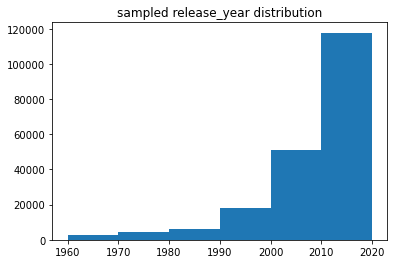


        bins   : [1960 1970 1980 1990 2000 2010 2020]
        counts : [2684, 4262, 6001, 17979, 51325, 117749]
          
columns: duration_m


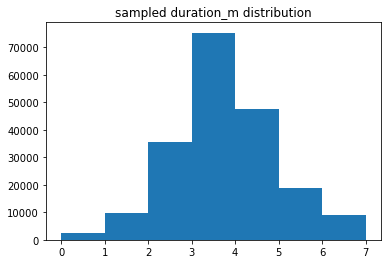


        bins   : [0 1 2 3 4 5 6 7]
        counts : [2631, 9663, 35473, 75375, 47747, 18904, 8951]
          
columns: popularity


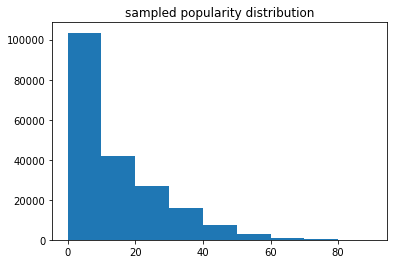


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [103460, 41910, 27123, 16128, 7410, 2852, 890, 202, 24]
          
columns: acousticness


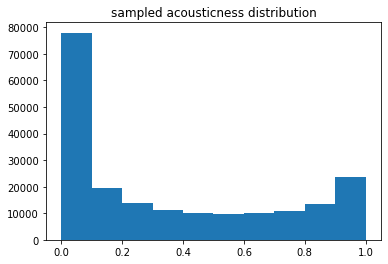


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [77956, 19625, 14004, 11231, 9905, 9628, 9965, 10775, 13437, 23474]
          
columns: danceability


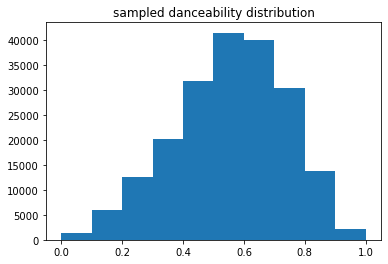


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1325, 6049, 12487, 20166, 31902, 41479, 40086, 30458, 13801, 2247]
          
columns: energy


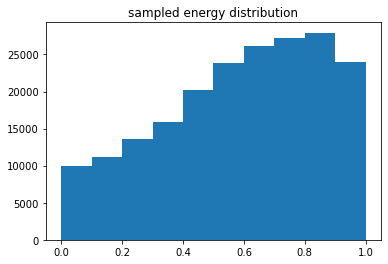


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [9991, 11229, 13575, 15886, 20269, 23828, 26113, 27263, 27928, 23918]
          
columns: instrumentalness


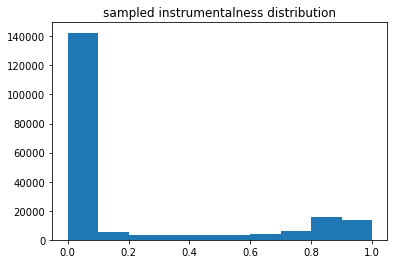


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [142491, 5266, 3620, 3043, 3007, 3196, 4083, 6387, 15418, 13489]
          
columns: liveness


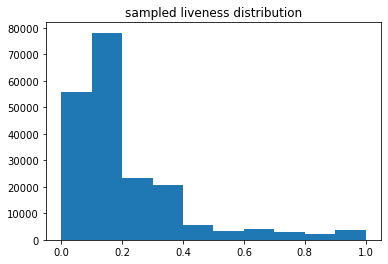


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [55886, 78138, 23407, 20539, 5644, 3507, 4176, 2991, 2137, 3575]
          
columns: loudness


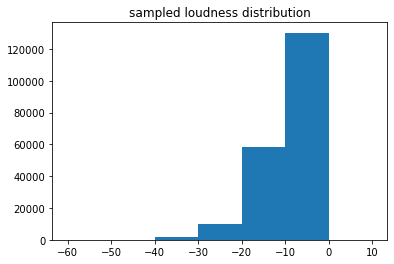


        bins   : [-60 -50 -40 -30 -20 -10   0  10]
        counts : [31, 133, 1461, 9936, 58199, 130161, 79]
          
columns: mode


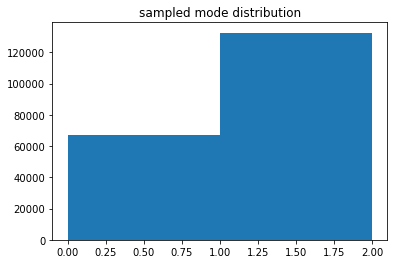


        bins   : [0 1 2]
        counts : [67394, 132606]
          
columns: speechiness


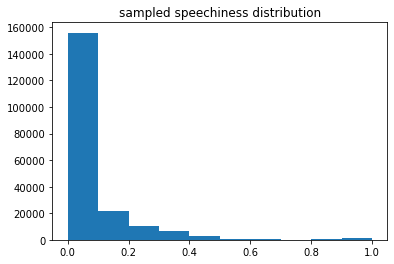


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [155896, 21585, 10463, 6711, 2642, 767, 306, 211, 378, 1041]
          
columns: tempo


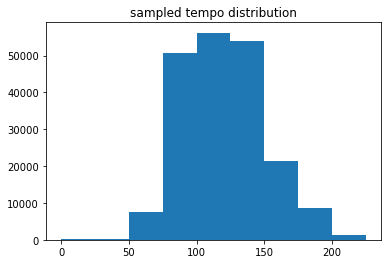


        bins   : [  0  25  50  75 100 125 150 175 200 225]
        counts : [302, 207, 7591, 50596, 56228, 53912, 21387, 8536, 1235]
          
columns: time_signature


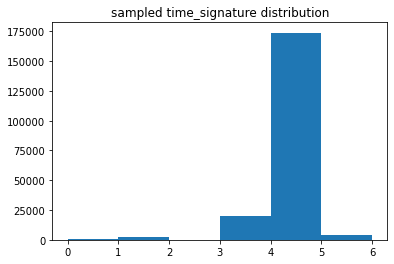


        bins   : [0 1 2 3 4 5 6]
        counts : [307, 2127, 0, 19839, 173857, 3870]
          
columns: valence


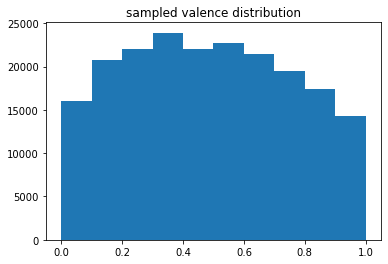


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [15979, 20731, 22028, 23903, 22013, 22746, 21464, 19465, 17410, 14261]
          


In [14]:
col_list = [
    "release_year",
    "duration_m", 
    "popularity",
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "loudness", 
    "mode", 
    "speechiness",
    "tempo", 
    "time_signature", 
    "valence"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col in ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]:
        bins = list(np.arange(0, 1.1, 0.1))
    elif col == "duration_m":
        bins = range(0, 8, 1)
    elif col == "popularity":
        bins = range(0, 100, 10)
    elif col == "loudness":
        bins = range(-60, 20, 10)
    elif col == "mode":
        bins = range(0, 3, 1)
    elif col == "tempo":
        bins = range(0, 250, 25)
    elif col == "time_signature": 
        bins = range(0, 7, 1)
    elif col == "release_year":
        bins=range(1960, 2030, 10)
        
    counts, bins, patches = plot_histogram(
                                sample_df[col].tolist(), 
                                title=f"sampled {col} distribution",
                                bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)